Cargo librerias

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

Creo los dataframe a apertir de archivos de excel

In [2]:
df_train = pd.read_excel('./bike_train.xlsx')
df_train.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
df_test = pd.read_excel('./bike_test.xlsx')
df_test.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0    12000 2012-05-20       2   1     5   4        0        0           0   
1    12001 2012-05-20       2   1     5   5        0        0           0   
2    12002 2012-05-20       2   1     5   6        0        0           0   
3    12003 2012-05-20       2   1     5   7        0        0           0   
4    12004 2012-05-20       2   1     5   8        0        0           0   

   weathersit  temp   atemp   hum  windspeed  
0           1  0.52  0.5000  0.68     0.0896  
1           1  0.50  0.4848  0.72     0.1045  
2           1  0.50  0.4848  0.63     0.1343  
3           1  0.52  0.5000  0.68     0.1940  
4           1  0.56  0.5303  0.56     0.1642

# EDA

Tabajaremos con series de tiempo, por lo cual todo el analisis va a realizar en este enfoque.

Exploracion de  los Dataframe

Dataframe Train

In [4]:
df_train.shape

(11999, 17)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [6]:
print('fecha_inicio', df_train.dteday.min())
print('fecha_fin', df_train.dteday.max())
print(df_train.dteday.max() - df_train.dteday.min())

fecha_inicio 2011-01-01 00:00:00
fecha_fin 2012-05-20 00:00:00
505 days 00:00:00


- Tenemos una `frecuencia de muestreo horaria` y una `ventana temporal` de 505 días. Lo más probable es que sea necesario resamplear la muestra. 

In [7]:
df_train.describe()

instant        season            yr          mnth            hr  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean    6000.000000      2.210684      0.279523      5.530294     11.556630   
std     3463.957275      1.088798      0.448784      3.433005      6.911891   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3000.500000      1.000000      0.000000      3.000000      6.000000   
50%     6000.000000      2.000000      0.000000      5.000000     12.000000   
75%     8999.500000      3.000000      1.000000      8.000000     18.000000   
max    11999.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.027752      3.009334      0.684057      1.435036      0.465704   
std        0.164269      2.005264      0.464910      0.650894      0.188576   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.320000   
50%        0.000000      3.000000      1.000000      1.000000      0.460000   
75%        0.000000      5.000000      1.000000      2.000000      0.620000   
max        1.000000      6.000000      1.000000      4.000000      0.960000   

              atemp           hum     windspeed        casual    registered  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.448888      0.625770      0.196433     30.049837    128.545129   
std        0.169633      0.200637      0.125394     43.596915    124.692750   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.303000      0.470000      0.104500      3.000000     29.000000   
50%        0.454500      0.620000      0.194000     13.000000     98.000000   
75%        0.590900      0.790000      0.283600     39.000000    185.000000   
max        1.000000      1.000000      0.850700    367.000000    770.000000   

                cnt  
count  11999.000000  
mean     158.594966  
std      151.392952  
min        1.000000  
25%       34.000000  
50%      118.000000  
75%      232.000000  
max      957.000000

Dataframe TEST

In [8]:
df_test.shape

(5380, 14)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


In [10]:
df_test.describe()

instant       season      yr         mnth           hr  \
count   5380.000000  5380.000000  5380.0  5380.000000  5380.000000   
mean   14689.500000     3.150558     1.0     8.784758    11.524721   
std     1553.216555     0.839184     0.0     2.145166     6.920601   
min    12000.000000     1.000000     1.0     5.000000     0.000000   
25%    13344.750000     3.000000     1.0     7.000000     6.000000   
50%    14689.500000     3.000000     1.0     9.000000    12.000000   
75%    16034.250000     4.000000     1.0    11.000000    18.000000   
max    17379.000000     4.000000     1.0    12.000000    23.000000   

           holiday      weekday  workingday   weathersit         temp  \
count  5380.000000  5380.000000  5380.00000  5380.000000  5380.000000   
mean      0.031041     2.991078     0.67974     1.403532     0.566758   
std       0.173444     2.007032     0.46662     0.612343     0.182800   
min       0.000000     0.000000     0.00000     1.000000     0.140000   
25%       0.000000     1.000000     0.00000     1.000000     0.400000   
50%       0.000000     3.000000     1.00000     1.000000     0.600000   
75%       0.000000     5.000000     1.00000     2.000000     0.700000   
max       1.000000     6.000000     1.00000     3.000000     1.000000   

             atemp          hum    windspeed  
count  5380.000000  5380.000000  5380.000000  
mean      0.535741     0.630483     0.175968  
std       0.161300     0.174493     0.113988  
min       0.151500     0.160000     0.000000  
25%       0.409100     0.490000     0.104500  
50%       0.575800     0.640000     0.164200  
75%       0.666700     0.780000     0.253700  
max       0.924200     1.000000     0.656700

Cambio tipos de datos

Graficamos y Analizamos datos:

Temas a analizar:
  Correlacion de rentadas con:

                                - cada variable

                                - grupo de variables

                                - día de la semana

                                - clima
                                
                                - Epoca del año
                               


Convertimos Fecha a Fecha y hora

In [11]:
df_train['fecha'] = df_train['dteday'].dt.strftime('%Y-%m-%d')
df_train['hr_str'] = df_train['hr'].astype('str') 
df_train['dteday'] = df_train['fecha'] + ' ' +df_train['hr_str']+':00:00'
df_train['dteday'] = pd.to_datetime(df_train['dteday'])
df_train.drop(columns= ['fecha','hr_str'], inplace= True)
df_train = df_train.set_index('dteday')
df_train = df_train.sort_index() 

In [12]:
df_test['fecha'] = df_test['dteday'].dt.strftime('%Y-%m-%d')
df_test['hr_str'] = df_test['hr'].astype('str') 
df_test['dteday'] = df_test['fecha'] + ' ' +df_test['hr_str']+':00:00'
df_test['dteday'] = pd.to_datetime(df_test['dteday'])
df_test.drop(columns= ['fecha','hr_str'], inplace= True)
df_test = df_test.set_index('dteday')
df_test = df_test.sort_index() 

In [13]:
#fig, ax = plt.subplots(figsize = (30, 10))
#sns.lineplot(x= df_train['dteday'], y= df_train['cnt'])

fig = px.line(df_train, x= df_train.index, y= df_train.cnt)
fig.update_layout(title ='Linea de tiempo horaria de Alquiler'
            )
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text= 'Renta')

In [14]:
fig = px.line(df_train, x= df_train.iloc[6000:6750].index, y= df_train.iloc[6000:6750].cnt)
fig.update_layout(title ='Muestra de Alquiler 30 dias',  
                           )
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text= 'Renta')

Realizamos resample para visualizar mejor y reducir ruidos

In [15]:
df_train.reset_index(inplace= True)

In [16]:
df_train_resample_D = df_train.resample('D', on = 'dteday').mean()

In [17]:
df_train_resample_D.head()

instant  season   yr  mnth         hr  holiday  weekday  \
dteday                                                                
2011-01-01     12.5     1.0  0.0   1.0  11.500000      0.0      6.0   
2011-01-02     36.0     1.0  0.0   1.0  11.782609      0.0      0.0   
2011-01-03     58.5     1.0  0.0   1.0  12.318182      0.0      1.0   
2011-01-04     81.0     1.0  0.0   1.0  11.869565      0.0      2.0   
2011-01-05    104.0     1.0  0.0   1.0  11.869565      0.0      3.0   

            workingday  weathersit      temp     atemp       hum  windspeed  \
dteday                                                                        
2011-01-01         0.0    1.583333  0.344167  0.363625  0.805833   0.160446   
2011-01-02         0.0    1.956522  0.363478  0.353739  0.696087   0.248539   
2011-01-03         1.0    1.000000  0.196364  0.189405  0.437273   0.248309   
2011-01-04         1.0    1.043478  0.200000  0.212122  0.590435   0.160296   
2011-01-05         1.0    1.000000  0.226957  0.229270  0.436957   0.186900   

               casual  registered        cnt  
dteday                                        
2011-01-01  13.791667   27.250000  41.041667  
2011-01-02   5.695652   29.130435  34.826087  
2011-01-03   5.454545   55.863636  61.318182  
2011-01-04   4.695652   63.217391  67.913043  
2011-01-05   3.565217   66.000000  69.565217

In [18]:
fig = px.line(df_train_resample_D, x= df_train_resample_D.index, y= df_train_resample_D.cnt)
fig.update_layout(title ='Resample Diario',  
                           )
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text= 'Renta')

Resample semanal

In [19]:
df_train_resample_W = df_train.resample('W', on = 'dteday').mean()

In [20]:
df_train_resample_W.head()

instant  season   yr  mnth         hr   holiday   weekday  \
dteday                                                                  
2011-01-02     24.0     1.0  0.0   1.0  11.638298  0.000000  3.063830   
2011-01-09    128.5     1.0  0.0   1.0  11.820988  0.000000  3.012346   
2011-01-16    291.0     1.0  0.0   1.0  11.742331  0.000000  3.000000   
2011-01-23    449.0     1.0  0.0   1.0  12.117647  0.156863  3.078431   
2011-01-30    595.0     1.0  0.0   1.0  11.956835  0.000000  2.892086   

            workingday  weathersit      temp     atemp       hum  windspeed  \
dteday                                                                        
2011-01-02    0.000000    1.765957  0.353617  0.358787  0.752128   0.203555   
2011-01-09    0.703704    1.259259  0.189136  0.192397  0.493333   0.212834   
2011-01-16    0.705521    1.349693  0.183804  0.189537  0.534479   0.203652   
2011-01-23    0.542484    1.555556  0.180784  0.182322  0.545294   0.222324   
2011-01-30    0.669065    1.625899  0.191367  0.207873  0.680863   0.144749   

              casual  registered        cnt  
dteday                                       
2011-01-02  9.829787   28.170213  38.000000  
2011-01-09  4.123457   53.950617  58.074074  
2011-01-16  4.134969   51.233129  55.368098  
2011-01-23  3.954248   53.366013  57.320261  
2011-01-30  4.474820   50.913669  55.388489

In [21]:
fig = px.line(df_train_resample_W, x= df_train_resample_W.index, y= df_train_resample_W.cnt)
fig.update_layout(title ='Resample Semanal',  
                           )
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text= 'Renta')

Se observa una alta mejora en la reducción de ruido. Deberemos ver cuanto afecta a la precisión de la predicción

#### Componentes de la serie de tiempo

- Media Móvil

Trabajaremos con todas las muestras

In [22]:
# cantidad de muestras
df_train_copia = df_train.copy()
len(df_train_copia)

11999

In [23]:
ventana_media_movil = (660)

In [24]:
semanal_promedio_tendencia = df_train_copia.cnt.rolling(window=ventana_media_movil, center = True).mean()
semanal_promedio_tendencia

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11994   NaN
11995   NaN
11996   NaN
11997   NaN
11998   NaN
Name: cnt, Length: 11999, dtype: float64

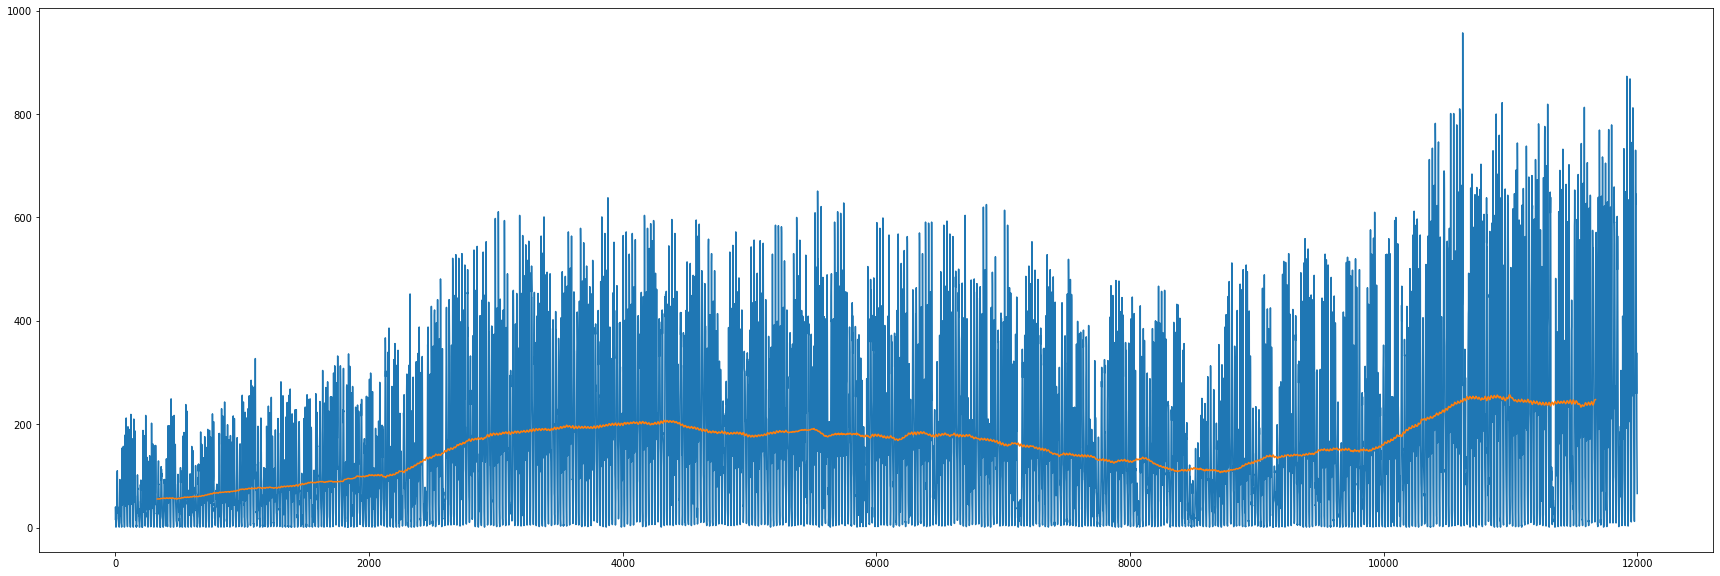

In [25]:
fig, ax = plt.subplots(figsize = (30, 10))
plt.plot(df_train_copia.index, df_train_copia.cnt)
plt.plot(semanal_promedio_tendencia)

- Estacionalidad

In [26]:
df_train_index = df_train_copia.set_index('dteday')

Text(0, 0.5, 'Rentas')

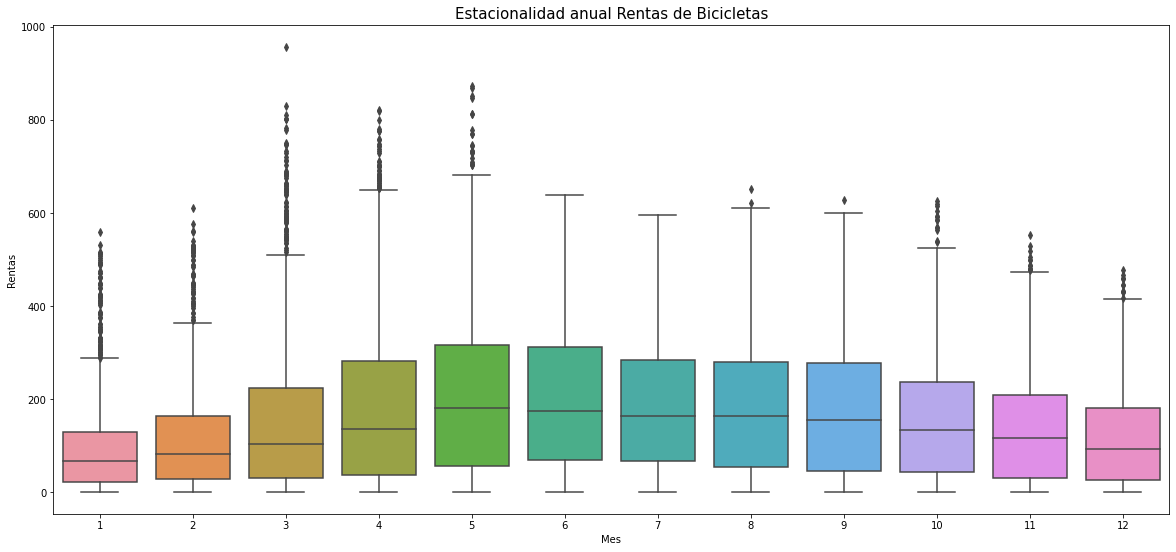

In [27]:
plt.figure(figsize = (20,9))
sns.boxplot(data=df_train_index,x=df_train_index.index.month,y= df_train_index.cnt)
plt.title('Estacionalidad anual Rentas de Bicicletas', fontsize = 15)
plt.xlabel('Mes')
plt.ylabel('Rentas')

- Otros analisis

In [28]:
# Correlación
# columnas season	yr	mnth	hr	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt
df_corr = df_train_copia[['yr',	'hr', 'mnth', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',  'cnt']].corr()

In [29]:
df_corr

yr        hr      mnth    season   holiday   weekday  \
yr          1.000000 -0.003948 -0.488103 -0.446665  0.001039 -0.002714   
hr         -0.003948  1.000000 -0.007060 -0.007610  0.000414 -0.004037   
mnth       -0.488103 -0.007060  1.000000  0.865268  0.009372  0.014500   
season     -0.446665 -0.007610  0.865268  1.000000 -0.008928 -0.003688   
holiday     0.001039  0.000414  0.009372 -0.008928  1.000000 -0.102503   
weekday    -0.002714 -0.004037  0.014500 -0.003688 -0.102503  1.000000   
workingday  0.001068  0.003454  0.006441  0.012630 -0.248601  0.031057   
weathersit -0.006309 -0.024003 -0.012239 -0.009029 -0.014707  0.017259   
temp       -0.198929  0.139251  0.353330  0.410790 -0.028519 -0.010002   
atemp      -0.190360  0.134633  0.358541  0.413196 -0.038005 -0.009841   
hum        -0.141319 -0.257202  0.201669  0.198937 -0.036672 -0.025932   
windspeed   0.067356  0.130441 -0.147042 -0.142924  0.022681  0.008447   
casual      0.053371  0.285182  0.078563  0.119043  0.022140  0.023687   
registered  0.171910  0.381933  0.061686  0.093595 -0.044534  0.019179   
cnt         0.156960  0.396698  0.073431  0.111369 -0.030304  0.022618   

            workingday  weathersit      temp     atemp       hum  windspeed  \
yr            0.001068   -0.006309 -0.198929 -0.190360 -0.141319   0.067356   
hr            0.003454   -0.024003  0.139251  0.134633 -0.257202   0.130441   
mnth          0.006441   -0.012239  0.353330  0.358541  0.201669  -0.147042   
season        0.012630   -0.009029  0.410790  0.413196  0.198937  -0.142924   
holiday      -0.248601   -0.014707 -0.028519 -0.038005 -0.036672   0.022681   
weekday       0.031057    0.017259 -0.010002 -0.009841 -0.025932   0.008447   
workingday    1.000000    0.042202  0.062273  0.066305  0.022805  -0.002493   
weathersit    0.042202    1.000000 -0.080149 -0.081386  0.430378   0.009195   
temp          0.062273   -0.080149  1.000000  0.991785 -0.019289  -0.013984   
atemp         0.066305   -0.081386  0.991785  1.000000 -0.003669  -0.057619   
hum           0.022805    0.430378 -0.019289 -0.003669  1.000000  -0.295765   
windspeed    -0.002493    0.009195 -0.013984 -0.057619 -0.295765   1.000000   
casual       -0.298241   -0.147903  0.450777  0.447899 -0.298354   0.067061   
registered    0.134789   -0.130223  0.322875  0.323264 -0.264382   0.091642   
cnt           0.025132   -0.149848  0.395743  0.395234 -0.303672   0.094791   

              casual  registered       cnt  
yr          0.053371    0.171910  0.156960  
hr          0.285182    0.381933  0.396698  
mnth        0.078563    0.061686  0.073431  
season      0.119043    0.093595  0.111369  
holiday     0.022140   -0.044534 -0.030304  
weekday     0.023687    0.019179  0.022618  
workingday -0.298241    0.134789  0.025132  
weathersit -0.147903   -0.130223 -0.149848  
temp        0.450777    0.322875  0.395743  
atemp       0.447899    0.323264  0.395234  
hum        -0.298354   -0.264382 -0.303672  
windspeed   0.067061    0.091642  0.094791  
casual      1.000000    0.503185  0.702414  
registered  0.503185    1.000000  0.968540  
cnt         0.702414    0.968540  1.000000

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_1672\675664977.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

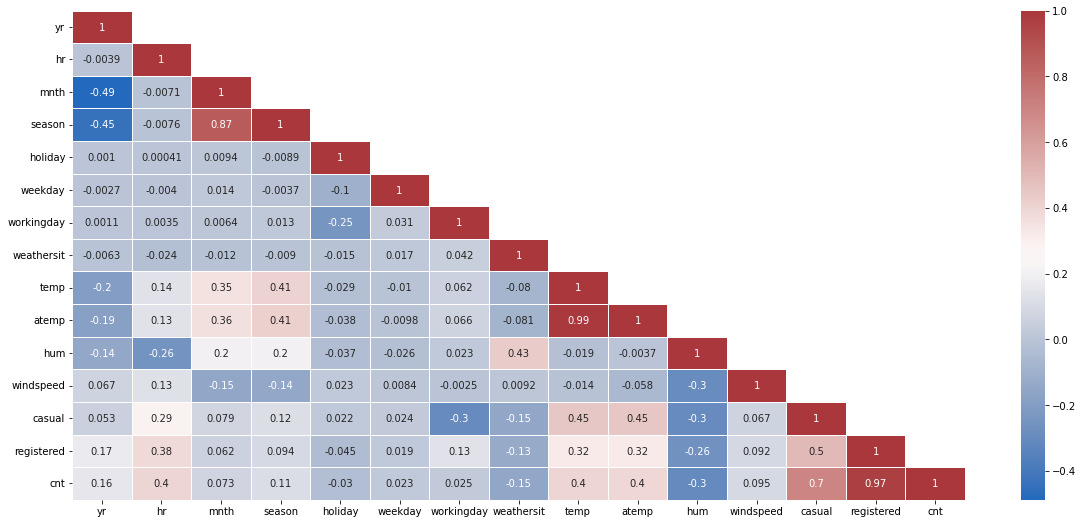

In [30]:
# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(df_corr.shape)).astype(np.bool)
df_corr = df_corr.where(bool_upper_matrix)

plt.figure(figsize = (20,9))
sns.heatmap(df_corr, linecolor= 'white', linewidths= 1, annot= True, cmap= "vlag")

In [31]:
df_corr.loc['cnt'].sort_values()

hum          -0.303672
weathersit   -0.149848
holiday      -0.030304
weekday       0.022618
workingday    0.025132
mnth          0.073431
windspeed     0.094791
season        0.111369
yr            0.156960
atemp         0.395234
temp          0.395743
hr            0.396698
casual        0.702414
registered    0.968540
cnt           1.000000
Name: cnt, dtype: float64

Mayores correlaciones:

- registered 0.95
- casual 0.70
- hr 0.39
- atemp 0.39
- temp 0.39
- hum -0.30

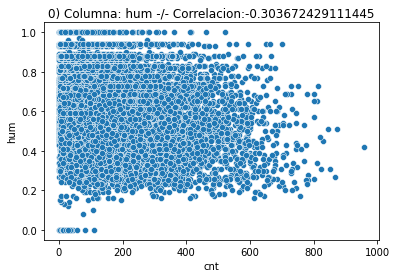

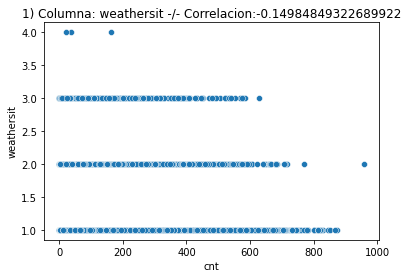

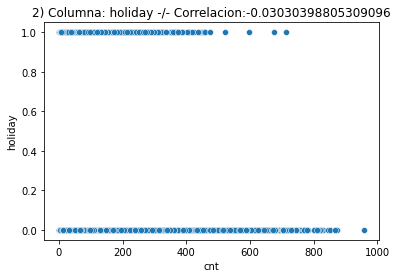

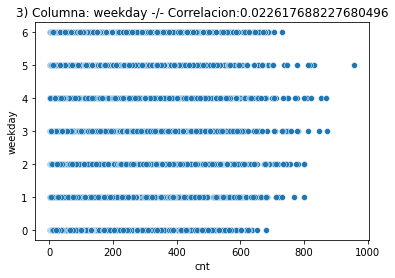

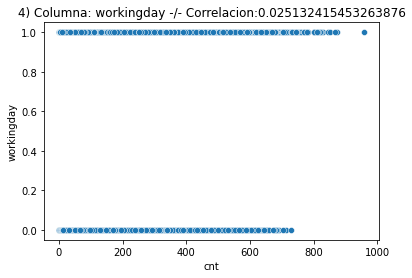

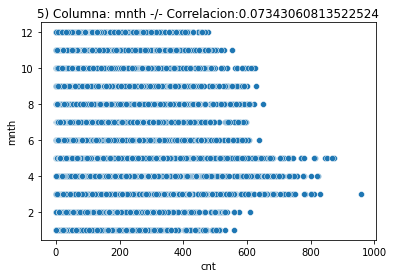

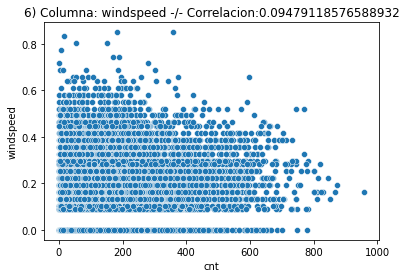

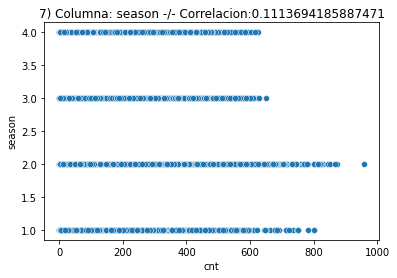

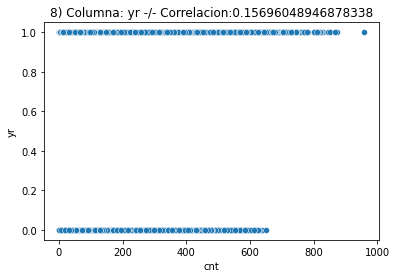

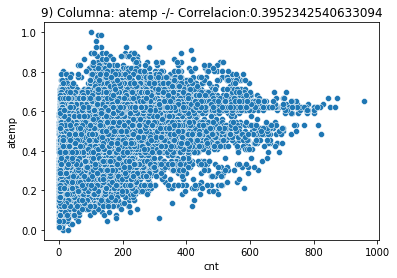

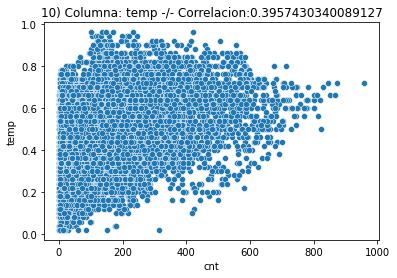

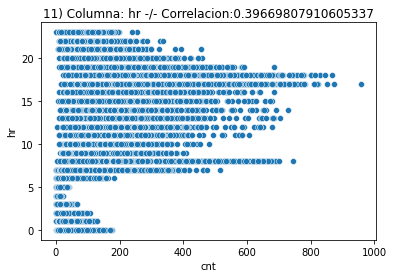

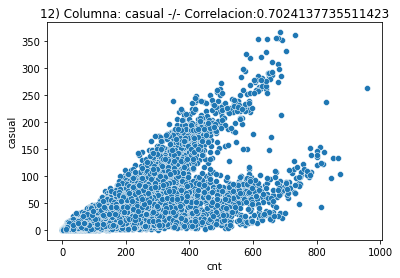

In [32]:
cols = df_corr.loc['cnt'].sort_values(ascending=True).index
vals = df_corr.loc['cnt'].sort_values(ascending=True).values

tam = len(vals)
i = 0
while i < tam:
    if not (vals[i] is None) and (cols[i] != 'cnt'):
        ax = plt.axes()
        sns.scatterplot(x="cnt", y=cols[i], data=df_train_copia[['cnt',cols[i]]])
        titulo = str(i) + ") Columna: " + str(cols[i]) + " -/- Correlacion:" + str(vals[i])
        ax.set_title(titulo)
        plt.show()
    i+=1

Text(0.5, 1.0, 'Dia Laboral')

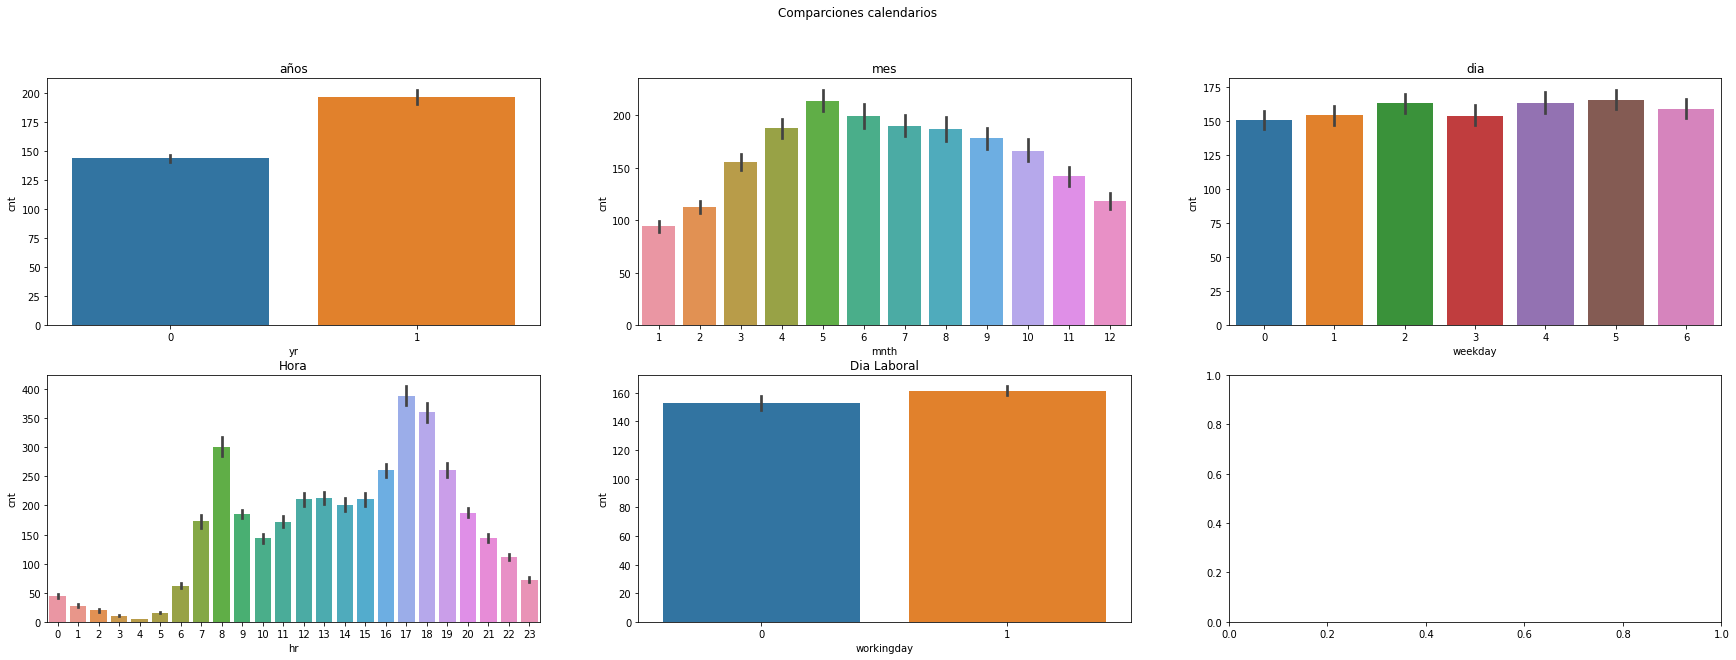

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharey=False)
fig.suptitle('Comparciones calendarios')

# Año
sns.barplot(ax=axes[0,0], x=df_train_copia['yr'], y=df_train_copia['cnt'])
axes[0,0].set_title('años')

# Mes
sns.barplot(ax=axes[0,1], x=df_train_copia['mnth'], y=df_train_copia['cnt'])
axes[0,1].set_title('mes')

# Dia
sns.barplot(ax=axes[0,2], x=df_train_copia['weekday'], y=df_train_copia['cnt'])
axes[0,2].set_title('dia')

# Hora 
sns.barplot(ax=axes[1,0], x=df_train_copia['hr'], y=df_train_copia['cnt'])
axes[1,0].set_title('Hora')

# Hora 
sns.barplot(ax=axes[1,1], x=df_train_copia['workingday'], y=df_train_copia['cnt'])
axes[1,1].set_title('Dia Laboral')


Text(0.5, 1.0, 'Velocidad viento')

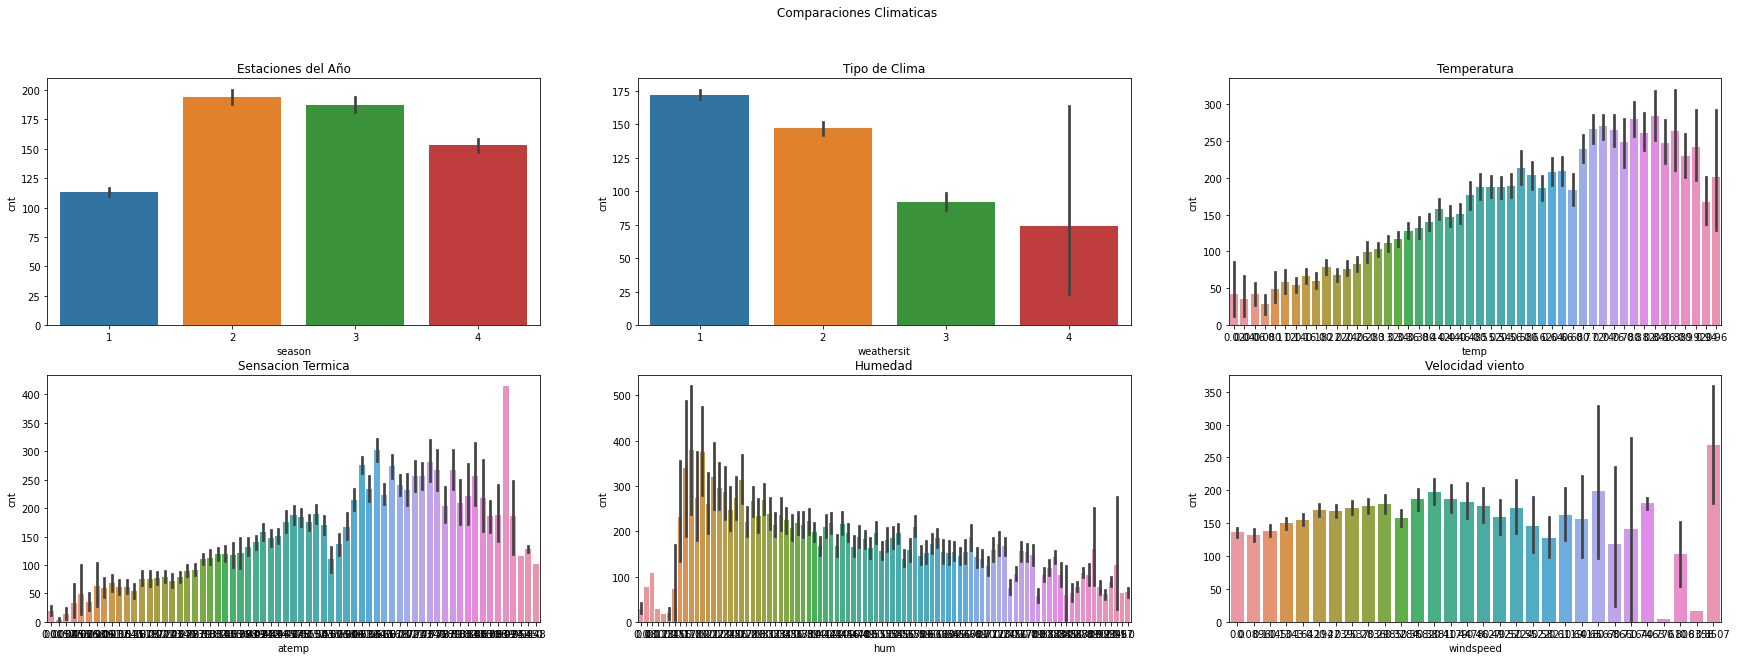

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharey=False)
fig.suptitle('Comparaciones Climaticas')

# Estacion del año
sns.barplot(ax=axes[0,0], x=df_train_copia['season'], y=df_train_copia['cnt'])
axes[0,0].set_title('Estaciones del Año')

# Tipo de clima
sns.barplot(ax=axes[0,1], x=df_train_copia['weathersit'], y=df_train_copia['cnt'])
axes[0,1].set_title('Tipo de Clima')

# Temperatura
sns.barplot(ax=axes[0,2], x=df_train_copia['temp'], y=df_train_copia['cnt'])
axes[0,2].set_title('Temperatura')

# Sensacion Termica
sns.barplot(ax=axes[1,0], x=df_train_copia['atemp'], y=df_train_copia['cnt'])
axes[1,0].set_title('Sensacion Termica')

# Humedad
sns.barplot(ax=axes[1,1], x=df_train_copia['hum'], y=df_train_copia['cnt'])
axes[1,1].set_title('Humedad')

# Velocidad viento
sns.barplot(ax=axes[1,2], x=df_train_copia['windspeed'], y=df_train_copia['cnt'])
axes[1,2].set_title('Velocidad viento')


# Modelo Predictivo (Series temporales)
### Forecasting con Prophet


### Corremos modelo con mas variables para registered

Entrenamiento. Quitamos columnas que no vamos a utilizar

In [46]:
# Genero dataframe de entrenamiento y transformo columna fechas.
df_grupo = df_train.copy()
df_grupo = df_grupo.rename(columns= {'dteday' : 'ds', 'registered' : 'y'})
df_grupo.head()

ds  instant  season  yr  mnth  hr  holiday  weekday  \
0 2011-01-01 00:00:00        1       1   0     1   0        0        6   
1 2011-01-01 01:00:00        2       1   0     1   1        0        6   
2 2011-01-01 02:00:00        3       1   0     1   2        0        6   
3 2011-01-01 03:00:00        4       1   0     1   3        0        6   
4 2011-01-01 04:00:00        5       1   0     1   4        0        6   

   workingday  weathersit  temp   atemp   hum  windspeed  casual   y  cnt  
0           0           1  0.24  0.2879  0.81        0.0       3  13   16  
1           0           1  0.22  0.2727  0.80        0.0       8  32   40  
2           0           1  0.22  0.2727  0.80        0.0       5  27   32  
3           0           1  0.24  0.2879  0.75        0.0       3  10   13  
4           0           1  0.24  0.2879  0.75        0.0       0   1    1

In [47]:
from prophet import Prophet

Creamos modelo y agregamos regresores

In [49]:
# Usamos algunois hiperparametros y seleccionamos mayores correlaciones
modelo_registered = Prophet(daily_seasonality= True, weekly_seasonality= True, changepoint_prior_scale= 0.5, seasonality_prior_scale= 5)
#modelo_registered.add_country_holidays(country_name='US')
#modelo_registered.add_regressor('casual')
#modelo_registered.add_regressor('registered')
#modelo_registered.add_regressor('season')
#modelo_registered.add_regressor('holiday')
modelo_registered.add_regressor('hr')
#modelo_registered.add_regressor('weekday')
#modelo_registered.add_regressor('weathersit')
#modelo_registered.add_regressor('workingday')
modelo_registered.add_regressor('temp')
modelo_registered.add_regressor('atemp')
modelo_registered.add_regressor('hum')
#modelo_registered.add_regressor('windspeed')
modelo_registered.fit(df_grupo)

10:43:26 - cmdstanpy - INFO - Chain [1] start processing
10:43:36 - cmdstanpy - INFO - Chain [1] done processing


### Evaluamos el Modelo de varias variables

In [50]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.utilities import regressor_coefficients 

In [51]:
df_cv = cross_validation(modelo_registered, horizon = '30 days')

  0%|          | 0/26 [00:00<?, ?it/s]10:43:59 - cmdstanpy - INFO - Chain [1] start processing
10:43:59 - cmdstanpy - INFO - Chain [1] done processing
  4%|▍         | 1/26 [00:01<00:25,  1.02s/it]10:44:00 - cmdstanpy - INFO - Chain [1] start processing
10:44:00 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 2/26 [00:02<00:31,  1.29s/it]10:44:01 - cmdstanpy - INFO - Chain [1] start processing
10:44:02 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▏        | 3/26 [00:03<00:27,  1.18s/it]10:44:02 - cmdstanpy - INFO - Chain [1] start processing
10:44:03 - cmdstanpy - INFO - Chain [1] done processing
 15%|█▌        | 4/26 [00:04<00:26,  1.20s/it]10:44:03 - cmdstanpy - INFO - Chain [1] start processing
10:44:04 - cmdstanpy - INFO - Chain [1] done processing
 19%|█▉        | 5/26 [00:06<00:25,  1.22s/it]10:44:05 - cmdstanpy - INFO - Chain [1] start processing
10:44:06 - cmdstanpy - INFO - Chain [1] done processing
 23%|██▎       | 6/26 [00:08<00:30,  1.53s/it]10:44:07

In [52]:
df_cv

ds        yhat  yhat_lower  yhat_upper    y  \
0     2011-04-11 04:00:00   -0.557146  -50.705777   48.700418    1   
1     2011-04-11 05:00:00   18.349035  -30.800193   65.510242   12   
2     2011-04-11 06:00:00   56.010431    9.743515  105.169716   59   
3     2011-04-11 07:00:00  101.112477   49.922936  149.591297  164   
4     2011-04-11 08:00:00  122.234360   77.810430  169.566011  286   
...                   ...         ...         ...         ...  ...   
18653 2012-05-19 23:00:00  173.889438   76.730175  271.676655  168   
18654 2012-05-20 00:00:00  112.002820   10.545111  206.260229  128   
18655 2012-05-20 01:00:00  128.613018   29.027113  223.558109  102   
18656 2012-05-20 02:00:00  109.244587   17.268048  206.469242   62   
18657 2012-05-20 03:00:00   71.421665  -31.741568  165.494417   40   

                   cutoff  
0     2011-04-11 03:00:00  
1     2011-04-11 03:00:00  
2     2011-04-11 03:00:00  
3     2011-04-11 03:00:00  
4     2011-04-11 03:00:00  
...                   ...  
18653 2012-04-20 03:00:00  
18654 2012-04-20 03:00:00  
18655 2012-04-20 03:00:00  
18656 2012-04-20 03:00:00  
18657 2012-04-20 03:00:00  

[18658 rows x 6 columns]

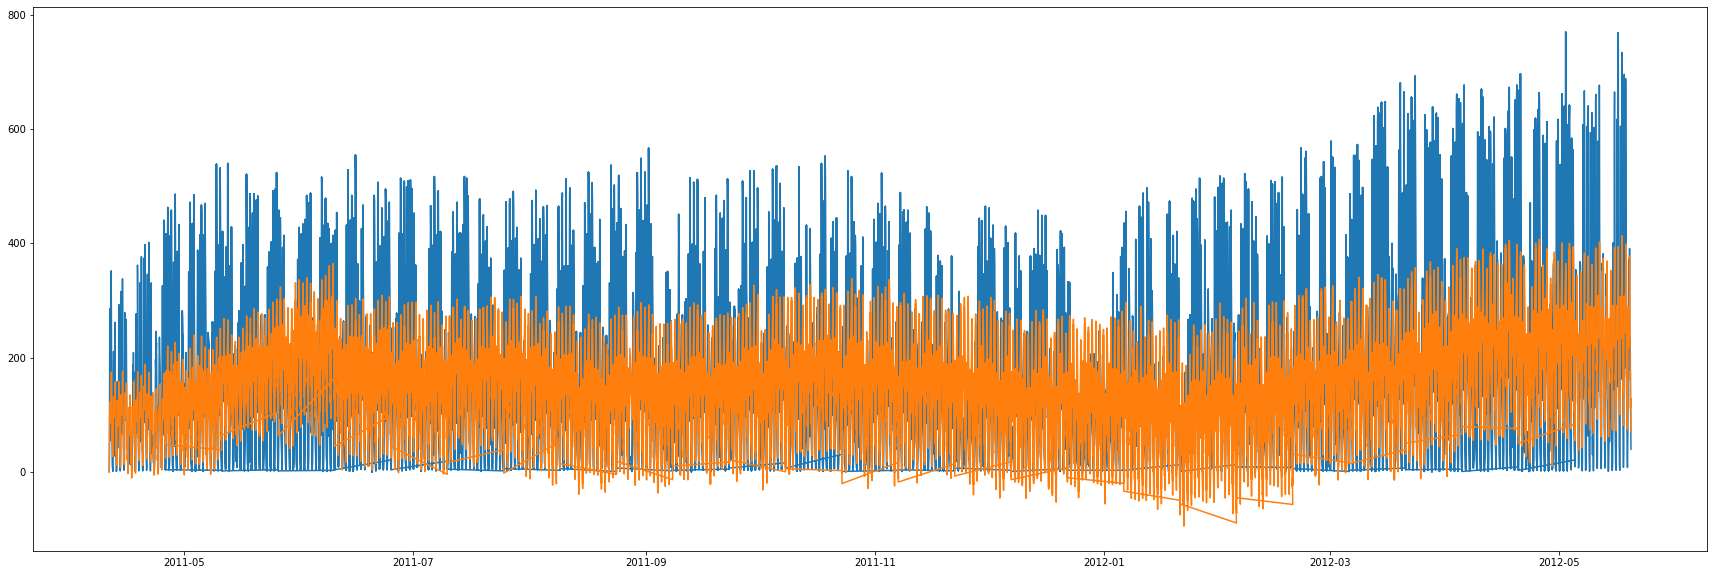

In [53]:
fig, ax = plt.subplots(figsize = (30, 10))
plt.plot(df_cv['ds'], df_cv.y, label= 'y')
plt.plot(df_cv['ds'], df_cv.yhat, label= 'yhat')


In [54]:
df_perform = performance_metrics(df_cv)
df_perform.describe()

horizon          mse        rmse         mae  \
count                        649   649.000000  649.000000  649.000000   
mean            16 days 12:00:00  7724.871765   87.839041   64.102349   
std    7 days 19:29:39.999703695   533.283733    3.031302    2.520459   
min              3 days 00:00:00  6862.784933   82.841927   59.965695   
25%              9 days 18:00:00  7203.334295   84.872459   61.622779   
50%             16 days 12:00:00  7798.511517   88.309181   64.382315   
75%             23 days 06:00:00  8226.779356   90.701595   66.275746   
max             30 days 00:00:00  8827.150822   93.952918   69.508024   

            mdape       smape    coverage  
count  649.000000  649.000000  649.000000  
mean     0.435898    0.635627    0.721654  
std      0.019595    0.019676    0.018231  
min      0.401285    0.594584    0.677748  
25%      0.423413    0.623291    0.709157  
50%      0.436457    0.633375    0.722871  
75%      0.442630    0.645519    0.737534  
max      0.491232    0.692752    0.754527

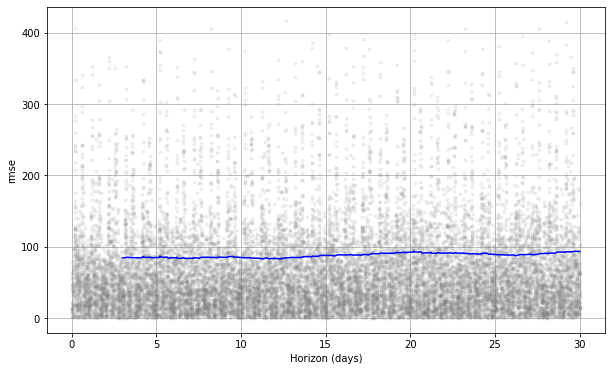

In [55]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [56]:
print('El RMSE es:', df_perform.rmse.mean())

El RMSE es: 87.83904105889775


In [57]:
df_p = performance_metrics(df_cv, rolling_window = 1)

In [58]:
df_p

horizon        mse       rmse        mae     mdape     smape  coverage
0 30 days  7742.8627  87.993538  64.135892  0.435763  0.635911  0.723121

In [59]:
from prophet.utilities import regressor_coefficients 

In [60]:
regressor_coefficients(modelo_registered)

regressor regressor_mode     center  coef_lower        coef  coef_upper
0        hr       additive  11.556630    3.840324    3.840324    3.840324
1      temp       additive   0.465704  -37.983184  -37.983184  -37.983184
2     atemp       additive   0.448888  197.380755  197.380755  197.380755
3       hum       additive   0.625770  -74.827457  -74.827457  -74.827457

Preparamos dataframe para prediccion y reralizamos prediccion

Predicción con datos reales y datos nuevos

In [61]:
#df_test_grupo = df_test[['dteday', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].copy()
df_test_grupo = df_test[['dteday', 'hr', 'temp', 'atemp', 'hum']].copy()
df_test_grupo = df_test_grupo.rename(columns= {'dteday' : 'ds'})

In [63]:
forecast3 = modelo_registered.predict(df_test_grupo)

In [294]:
plot_plotly(modelo2,forecast3)

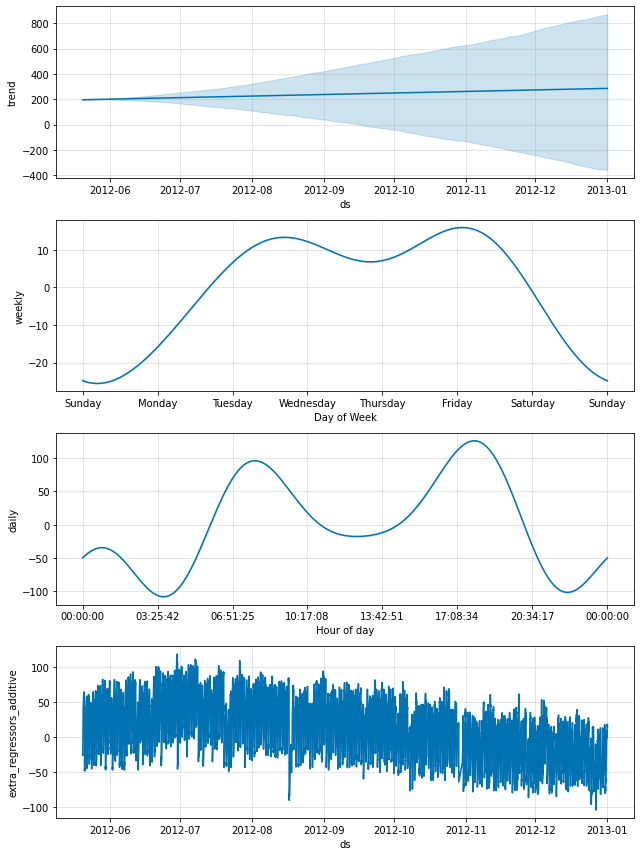

In [64]:
fig3 = modelo_registered.plot_components(forecast3)

Creamos archivo a exportar

In [71]:
df_export = forecast3[['ds', 'yhat']].copy()

df_export.rename(columns = {'yhat': 'registered'}, inplace= True)
df_export.to_csv('pred_registered.csv', index= False)

### Ajustes de hiperparametros

In [309]:
# Genero dataframe de entrenamiento y transformo columna fechas.
#df_grupo2 = df_train[['dteday', 'hr', 'mnth', 'cnt', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].copy()
df_grupo2 = df_train[['dteday', 'cnt', 'hr', 'mnth','weekday', 'season', 'holiday', 'weathersit', 'temp', 'atemp']].copy()
df_grupo2 = df_grupo2.rename(columns= {'dteday' : 'ds', 'cnt' : 'y'})
df_grupo2.head()

ds   y  hr  mnth  weekday  season  holiday  weathersit  \
0 2011-01-01 00:00:00  16   0     1        6       1        0           1   
1 2011-01-01 01:00:00  40   1     1        6       1        0           1   
2 2011-01-01 02:00:00  32   2     1        6       1        0           1   
3 2011-01-01 03:00:00  13   3     1        6       1        0           1   
4 2011-01-01 04:00:00   1   4     1        6       1        0           1   

   temp   atemp  
0  0.24  0.2879  
1  0.22  0.2727  
2  0.22  0.2727  
3  0.24  0.2879  
4  0.24  0.2879

In [328]:
# Python
import itertools
import numpy as np
import pandas as pd

# Parametros a variar
param_grid = {  
    'changepoint_prior_scale': [0.01, 0.05, 0.5],
    'seasonality_prior_scale': [10],
    'seasonality_mode' : ['multiplicative'],
    'daily_seasonality' : [True], 
    'weekly_seasonality' : [True], 
    'yearly_seasonality' : [False], 
    #'n_changepoints' : [240, 24, 2400],
    #'interval_width' : [0.95, 0.80],
    #'uncertainty_samples' : [50, 100],

}

# Generacion de combinacion de todos los parametros
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Uso de cross validation para evaluar todos los parametros
for params in all_params:
    m = Prophet(**params) 
    m.add_regressor('season')
    m.add_regressor('holiday')
    m.add_regressor('hr')
    #m.add_regressor('mnth')
    #m.add_regressor('weekday') 
    m.add_regressor('weathersit')
    #m.add_regressor('workingday') Cero cambio
    m.add_regressor('temp') # Cero Cambio
    #m.add_regressor('atemp')
    #m.add_regressor('hum')
    #m.add_regressor('windspeed') Cero cambio
    m.fit(df_grupo2)
    df_cv = cross_validation(m, horizon='10 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Buscamos mejores parametros de rmse
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)


00:29:27 - cmdstanpy - INFO - Chain [1] start processing
00:29:30 - cmdstanpy - INFO - Chain [1] done processing
00:31:11 - cmdstanpy - INFO - Chain [1] start processing
00:31:17 - cmdstanpy - INFO - Chain [1] done processing
00:33:47 - cmdstanpy - INFO - Chain [1] start processing
00:33:56 - cmdstanpy - INFO - Chain [1] done processing


   changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                     0.01                       10   multiplicative   
1                     0.05                       10   multiplicative   
2                     0.50                       10   multiplicative   

   daily_seasonality  weekly_seasonality  yearly_seasonality       rmse  
0               True                True               False  90.874468  
1               True                True               False  90.183190  
2               True                True               False  90.886556  


In [329]:
# Python
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'seasonality_mode': 'multiplicative', 'daily_seasonality': True, 'weekly_seasonality': True, 'yearly_seasonality': False}


### Corremos nuevamente el modelo con los hiperparametros modificados

Entrenamiento. Quitamos columnas que no vamos a utilizar

In [313]:
# Genero dataframe de entrenamiento y transformo columna fechas.
df_grupo3 = df_train.copy()
df_grupo3 = df_grupo.rename(columns= {'dteday' : 'ds', 'cnt' : 'y'})
df_grupo3.head()

instant  season  yr  mnth  hr  holiday  weekday  \
ds                                                                     
2011-01-01 00:00:00        1       1   0     1   0        0        6   
2011-01-01 01:00:00        2       1   0     1   1        0        6   
2011-01-01 02:00:00        3       1   0     1   2        0        6   
2011-01-01 03:00:00        4       1   0     1   3        0        6   
2011-01-01 04:00:00        5       1   0     1   4        0        6   

                     workingday  weathersit  temp   atemp   hum  windspeed  \
ds                                                                           
2011-01-01 00:00:00           0           1  0.24  0.2879  0.81        0.0   
2011-01-01 01:00:00           0           1  0.22  0.2727  0.80        0.0   
2011-01-01 02:00:00           0           1  0.22  0.2727  0.80        0.0   
2011-01-01 03:00:00           0           1  0.24  0.2879  0.75        0.0   
2011-01-01 04:00:00           0           1  0.24  0.2879  0.75        0.0   

                     casual  registered   y  
ds                                           
2011-01-01 00:00:00       3          13  16  
2011-01-01 01:00:00       8          32  40  
2011-01-01 02:00:00       5          27  32  
2011-01-01 03:00:00       3          10  13  
2011-01-01 04:00:00       0           1   1

In [314]:
from prophet import Prophet

Creamos modelo y agregamos regresores

In [316]:
df_grupo3.reset_index(inplace= True)

In [317]:
modelo3 = Prophet(daily_seasonality= True, weekly_seasonality= True, changepoint_prior_scale= 0.05, seasonality_prior_scale= 2, seasonality_mode= 'multiplicative', yearly_seasonality= False)
#modelo3.add_country_holidays(country_name='US')
modelo3.add_regressor('season')
modelo3.add_regressor('holiday')
modelo3.add_regressor('hr')
#modelo3.add_regressor('weekday')
modelo3.add_regressor('weathersit')
#modelo3.add_regressor('workingday')
#modelo3.add_regressor('temp')
modelo3.add_regressor('atemp')
#modelo3.add_regressor('hum')
#modelo3.add_regressor('windspeed')
modelo3.fit(df_grupo3)

23:44:05 - cmdstanpy - INFO - Chain [1] start processing
23:44:11 - cmdstanpy - INFO - Chain [1] done processing


Preparamos dataframe para prediccion y reralizamos prediccion

Prediccón con datos nuevos

In [330]:
#df_test_grupo = df_test[['dteday', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].copy()
df_test_grupo2 = df_test[['dteday', 'season', 'holiday', 'hr', 'weathersit', 'atemp']].copy()
df_test_grupo2 = df_test_grupo2.rename(columns= {'dteday' : 'ds'})

In [331]:
forecast4 = modelo3.predict(df_test_grupo2)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
20   2012-05-21 00:00:00  273.087349 -139.968538   71.765408   273.087349   
21   2012-05-21 01:00:00  273.130367 -105.841584  111.237313   273.130367   
22   2012-05-21 02:00:00  273.173385 -154.806820   66.318378   273.173385   
23   2012-05-21 03:00:00  273.216403 -158.277289   51.123685   273.216403   
24   2012-05-21 04:00:00  273.259421 -235.133349  -18.508501   273.259421   
...                  ...         ...         ...         ...          ...   
5356 2012-12-31 00:00:00  504.351701 -112.259768  102.662189   306.772962   
5358 2012-12-31 02:00:00  504.437737 -139.831277   77.512321   306.890263   
5359 2012-12-31 03:00:00  504.480755 -268.209802  -29.149912   306.948914   
5360 2012-12-31 04:00:00  504.523773 -298.630217  -46.759750   307.007565   
5361 2012-12-31 05:00:00  504.566791 -132.207245   87.724028   307.066216   

      trend_upper     atemp  atemp_lower  atemp_upper     daily  ...  \
20     273.087349  0.085564     0.085564     0.085564 -0.487672  ...   
21     273.130367  0.085564     0.085564     0.085564 -0.407339  ...   
22     273.173385  0.072102     0.072102     0.072102 -0.582928  ...   
23     273.216403  0.072102     0.072102     0.072102 -0.848679  ...   
24     273.259421  0.072102     0.072102     0.072102 -0.916040  ...   
...           ...       ...          ...          ...       ...  ...   
5356   683.516407 -0.236545    -0.236545    -0.236545 -0.487672  ...   
5358   683.716580 -0.249918    -0.249918    -0.249918 -0.582928  ...   
5359   683.816666 -0.236545    -0.236545    -0.236545 -0.848679  ...   
5360   683.916752 -0.249918    -0.249918    -0.249918 -0.916040  ...   
5361   684.016838 -0.263380    -0.263380    -0.263380 -0.635417  ...   

      weathersit  weathersit_lower  weathersit_upper    weekly  weekly_lower  \
20     -0.336296         -0.336296         -0.336296 -0.065924     -0.065924   
21     -0.336296         -0.336296         -0.336296 -0.067456     -0.067456   
22     -0.336296         -0.336296         -0.336296 -0.068544     -0.068544   
23     -0.121405         -0.121405         -0.121405 -0.069180     -0.069180   
24     -0.336296         -0.336296         -0.336296 -0.069361     -0.069361   
...          ...               ...               ...       ...           ...   
5356    0.093485          0.093485          0.093485 -0.065924     -0.065924   
5358    0.093485          0.093485          0.093485 -0.068544     -0.068544   
5359    0.093485          0.093485          0.093485 -0.069180     -0.069180   
5360    0.093485          0.093485          0.093485 -0.069361     -0.069361   
5361    0.093485          0.093485          0.093485 -0.069087     -0.069087   

      weekly_upper  additive_terms  additive_terms_lower  \
20       -0.065924             0.0                   0.0   
21       -0.067456             0.0                   0.0   
22       -0.068544             0.0                   0.0   
23       -0.069180             0.0                   0.0   
24       -0.069361             0.0                   0.0   
...            ...             ...                   ...   
5356     -0.065924             0.0                   0.0   
5358     -0.068544             0.0                   0.0   
5359     -0.069180             0.0                   0.0   
5360     -0.069361             0.0                   0.0   
5361     -0.069087             0.0                   0.0   

      additive_terms_upper        yhat  
20                     0.0  -29.919442  
21                     0.0   -1.195130  
22                     0.0  -45.929124  
23                     0.0  -52.798020  
24                     0.0 -122.774029  
...                    ...         ...  
5356                   0.0   -1.755620  
5358                   0.0  -31.257069  
5359                   0.0 -145.591082  
5360                   0.0 -173.115820  
5361                   0.0  -24.880012  

[373 rows x 37 columns]

In [332]:
plot_plotly(modelo3,forecast4)

In [321]:
fig3 = modelo3.plot_components(forecast4)

Creamos archivo a exportar

In [ ]:
forecast4['yhat'] = forecast4['yhat'].apply(lambda x: 0 if x < 0 else x)

In [346]:

df_export = pd.DataFrame(forecast4['yhat'])

df_export.rename(columns = {'yhat': 'pred'}, inplace= True)
#df_export.to_csv('vilarmauricio.csv', index= False)